     a    b    d     g
0  0.1  1.0  1.0   1.0
1  0.2  1.2  1.2   1.2
2  0.4  1.4  1.4   1.4
3  0.6  1.6  1.6  10.0
     a    b    d     g
0  0.6  1.0  1.0   1.0
1  0.2  1.2  1.2   1.2
2  0.4  1.4  1.4   1.4
3  0.6  1.6  1.6  10.0
     a    b    d     g
0  0.6  1.6  1.0   1.0
1  0.2  1.2  1.2   1.2
2  0.4  1.4  1.4   1.4
3  0.6  1.6  1.6  10.0
     a    b    d     g
0  0.6  1.6  1.6   1.0
1  0.2  1.2  1.2   1.2
2  0.4  1.4  1.4   1.4
3  0.6  1.6  1.6  10.0


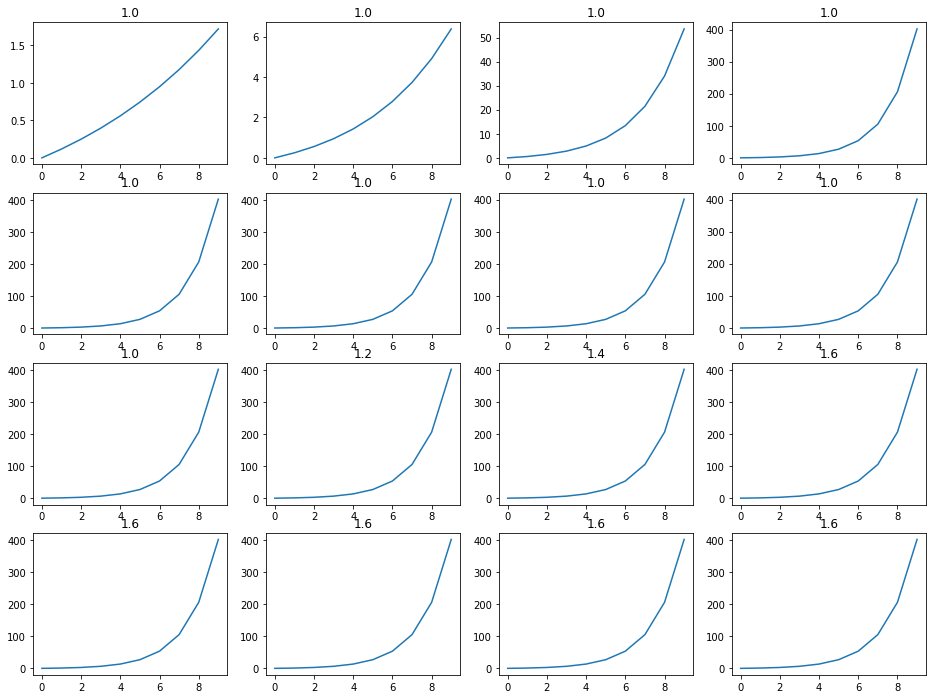

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize

class Market:
    
    def __init__(self, p, a=0.1, b=1, d=1, g=1):
        self.a, self.b, self.d, self.g, self.p = a, b, d, g, p 
        
    def supply(self):
        a, b, p = self.a, self.b, self.p
        return np.exp(a*p) - b
    
    def demand(self):
        return g*(p**(-d))
    
    def equillibrium(self):
        return self.supply()-self.demand()

parameters = {'a' : [0.1, 0.2, 0.4, 0.6],
              'b' : [  1, 1.2, 1.4, 1.6],
              'd' : [  1, 1.2, 1.4, 1.6],
              'g' : [  1, 1.2, 1.4, 10]}

df = pd.DataFrame(parameters)



num_cols = 4
num_rows = 4

p = np.linspace(0, 10, 10)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(16,12))

for j in range(num_rows):
    print(df)
    series = pd.Series(df.iloc[0])  #Has no impact
    for i in range(num_cols):
        series.iat[j] = df.iat[i,j] #This fucks all up. Instead of only generating one independent series, 
                                    #it influences the dataframe. new series generation further up ist not 
                                    #compensating for this.
        #print(series)
        a, b, d, g = series.iat[0], series.iat[1], series.iat[2], series.iat[3]
        m = Market(p, a, b, d, g)
        ax[j,i].set_title(d)
        ax[j,i].plot(m.supply())
        
        

In [1]:
#p = np.linspace(0, 10, 100)
#m = Market(p)
#fig, ax = plt.subplots(3,4,figsize=(7,30))
#ax.plot(m.supply())
#ax.plot(m.demand())
#ax.plot(m.equillibrium())

2